In [1]:
import netCDF4 as nc 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, BoundaryNorm, ListedColormap

In [2]:
# Load NetCDF file
nc_file_path = './nc_files/sea_surface_temperature0.nc'  # Replace with the path to your NetCDF file
nc_dataset = nc.Dataset(nc_file_path, 'r')

In [3]:
nc_dataset.variables.keys()

dict_keys(['lon', 'lat', 'time', 'time_bnds', 'SST'])

In [4]:
longitude = nc_dataset["lon"][:].data
latitude = nc_dataset["lat"][:].data

In [5]:
SST_data = nc_dataset['SST'][:].data.squeeze()

In [6]:
SST_data.shape

(720, 1440)

In [7]:
# getting all the file names and dates
file_paths = []
for i in range(10):
    temp = "./nc_files/sea_surface_temperature" + str(i) + ".nc"
    file_paths.append(temp)
        
file_paths

['./nc_files/sea_surface_temperature0.nc',
 './nc_files/sea_surface_temperature1.nc',
 './nc_files/sea_surface_temperature2.nc',
 './nc_files/sea_surface_temperature3.nc',
 './nc_files/sea_surface_temperature4.nc',
 './nc_files/sea_surface_temperature5.nc',
 './nc_files/sea_surface_temperature6.nc',
 './nc_files/sea_surface_temperature7.nc',
 './nc_files/sea_surface_temperature8.nc',
 './nc_files/sea_surface_temperature9.nc']

In [8]:
# distribution = np.array([10, 20.0])
num = 34
total = 0
count = 0
maxx = 0
for file_path in file_paths:
    print(file_path)
    dSet = nc.Dataset(file_path)
    SST_data = nc_dataset['SST'][:].data.squeeze()
    print(np.max(SST_data))
    maxx = max(maxx, np.max(SST_data).item())
    SST_data[SST_data < 0] = np.nan
    temp = SST_data[SST_data>num].reshape(-1).shape[0]
    count+=temp
    total += SST_data.reshape(-1).shape[0] 

print(f"the percentage of values > {num} is {count/total * 100}%")
print(f"the maximum value turned out to be {maxx}")

# range is -999.0 to 33.585

./nc_files/sea_surface_temperature0.nc
33.585
./nc_files/sea_surface_temperature1.nc
33.585
./nc_files/sea_surface_temperature2.nc
33.585
./nc_files/sea_surface_temperature3.nc
33.585
./nc_files/sea_surface_temperature4.nc
33.585
./nc_files/sea_surface_temperature5.nc
33.585
./nc_files/sea_surface_temperature6.nc
33.585
./nc_files/sea_surface_temperature7.nc
33.585
./nc_files/sea_surface_temperature8.nc
33.585
./nc_files/sea_surface_temperature9.nc
33.585
the percentage of values > 34 is 0.0%
the maximum value turned out to be 33.584999084472656


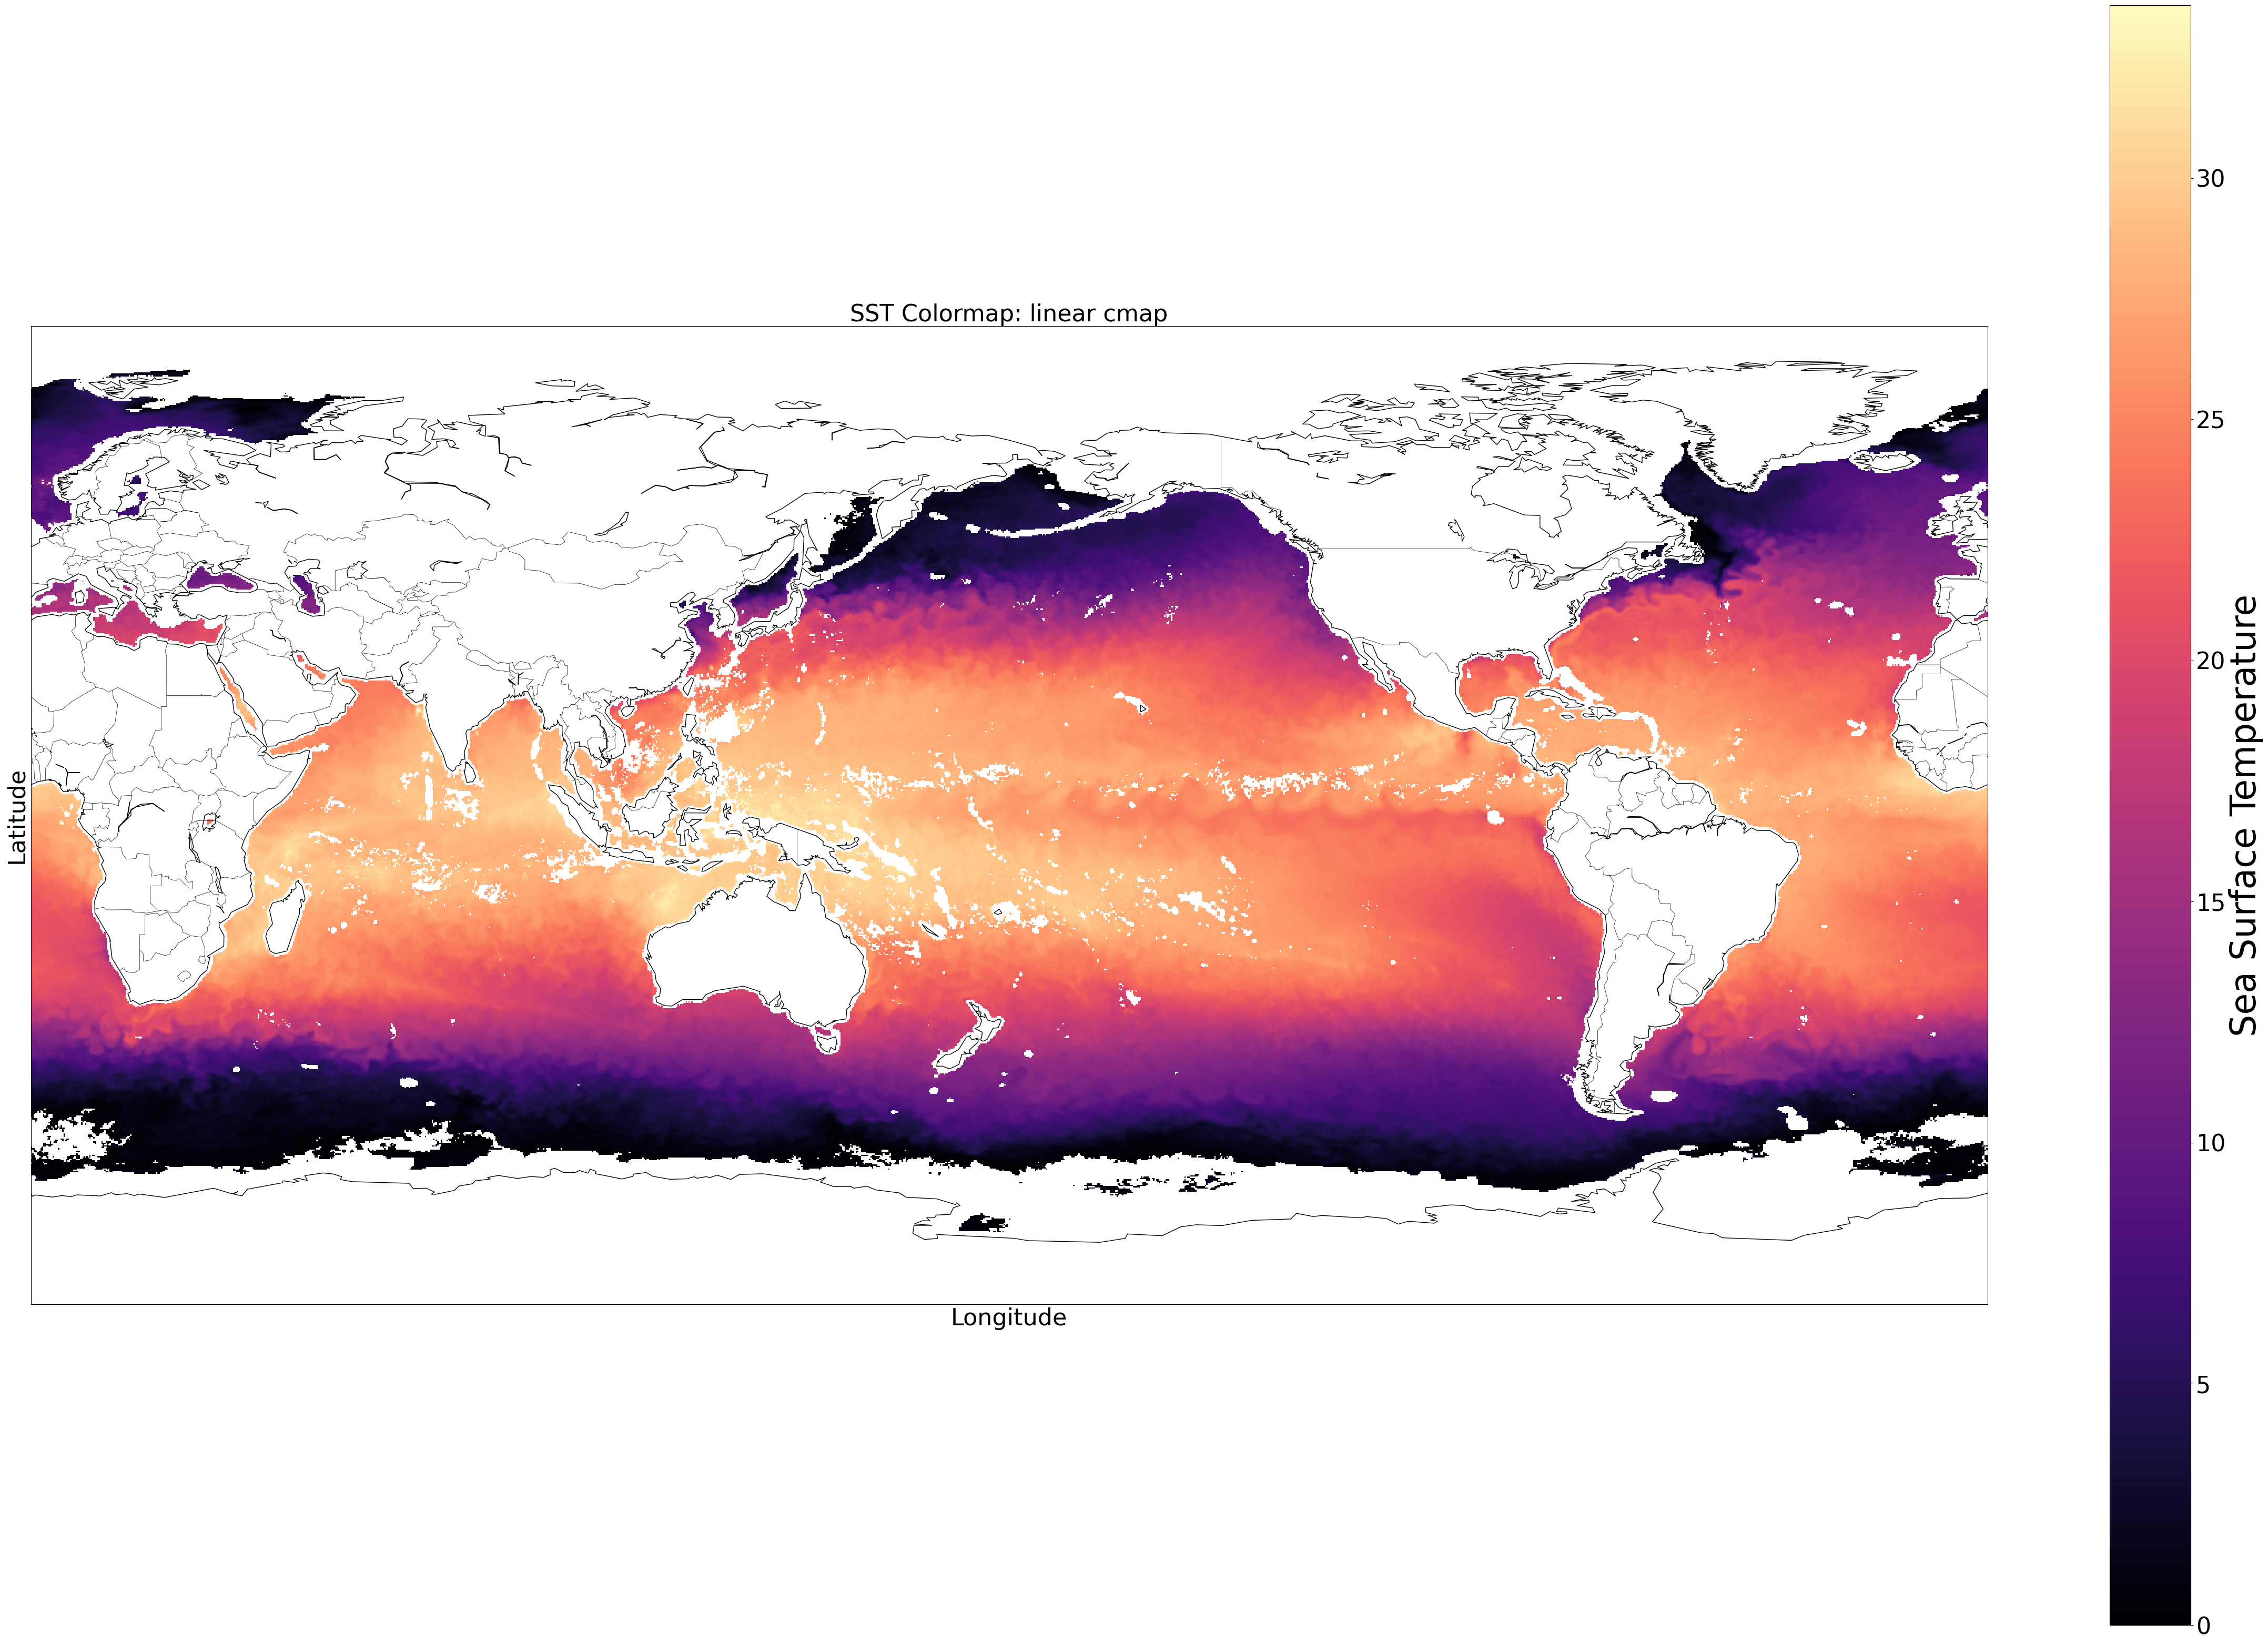

In [9]:
# For experimental purposes
# Create a b instance for the world map
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)
# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)
# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()
# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(longitude, latitude)
x, y = m(x, y)
# Create the color plot (heatmap)
cax = ax.pcolormesh(x, y, SST_data, cmap='magma', shading='auto', vmin=0, vmax=33.585)
# Add a colorbar
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=32)
cbar.set_label('Sea Surface Temperature', fontsize=48)
# Add labels and title
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude', fontsize=32)
ax.set_title('SST Colormap: linear cmap', fontsize=32)
# Show the plot
plt.show()

In [19]:
def plot_graph(SST_data, i, map_type, day):
    # Create a b instance for the world map
    m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

    # Create a figure and axis
    fig = plt.figure(figsize=(12*5, 8*5))
    ax = fig.add_subplot(1, 1, 1)

    # Draw the coastlines and countries
    m.drawcoastlines()
    m.drawcountries()


    # Convert longitude and latitude to map coordinates
    x, y = np.meshgrid(longitude, latitude)
    x, y = m(x, y)

    # Create the color plot (heatmap)
    cax = ax.pcolormesh(x, y, SST_data, cmap=map_type, shading='auto', vmin=0, vmax=33.585)

    # Add a colorbar
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=32)
    cbar.set_label('Sea Surface Temperature', fontsize=48)

    # Add labels and title
    ax.set_xlabel('Longitude', fontsize=32)
    ax.set_ylabel('Latitude', fontsize=32)
    ax.set_title('SST Colormap: linear cmap | Jet | ' + day + ' |', fontsize=32)
    plt.savefig('./images/' + map_type +'/image_' + map_type + '_' + str(i) + '.jpg')
    # Show the plot
    plt.show()

In [11]:
def plot_graph_disc(SST_data, i):
        # Number of discrete levels in the colormap
    num_levels = 10
    
    # Define custom boundaries for discrete levels
    boundaries = np.linspace(0, 20, num_levels + 1)
    
    # Create a Basemap instance for the world map
    m = Basemap(projection='mill', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)
    
    # Create a figure and axis
    fig = plt.figure(figsize=(12*5, 8*5))
    ax = fig.add_subplot(1, 1, 1)
    
    # Draw the coastlines and countries
    m.drawcoastlines()
    m.drawcountries()
    
    # Convert longitude and latitude to map coordinates
    x, y = np.meshgrid(longitude, latitude)
    x, y = m(x, y)
    
    # Create a ListedColormap with the desired number of colors
    cmap = plt.get_cmap('viridis', num_levels)
    
    # Create the color plot (heatmap) with discrete levels in the colormap
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)
    cax = ax.pcolormesh(x, y, SST_data, cmap=cmap, shading='auto', norm=norm)
    
    # Add a colorbar
    cbar = fig.colorbar(cax)
    cbar.set_label('SST', fontsize=48)
    cbar.ax.tick_params(labelsize=32)
    
    
    # Add labels and title
    ax.set_xlabel('Longitude', fontsize=32)
    ax.set_ylabel('Latitude', fontsize=32)
    ax.set_title(f'SST : discrete cmap , {num_levels} levels)', fontsize=32)
    plt.savefig('./images/image_disc_' + str(i) + '.jpg')
    # Show the plot
    plt.show()

In [12]:
def plot_graph_log(SST_data, i, map_type):
    # Create a b instance for the world map
    m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

    # Create a figure and axis
    fig = plt.figure(figsize=(12*5, 8*5))
    ax = fig.add_subplot(1, 1, 1)

    # Draw the coastlines and countries
    m.drawcoastlines()
    m.drawcountries()


    # Convert longitude and latitude to map coordinates
    x, y = np.meshgrid(longitude, latitude)
    x, y = m(x, y)

    # Create the color plot (heatmap)
    cax = ax.pcolormesh(x, y, SST_data, cmap=map_type, norm=LogNorm(vmin=0.0000001, vmax=40), shading='auto')

    # Add a colorbar
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=32)
    cbar.set_label('Sea Surface Temperature', fontsize=48)

    # Add labels and title
    ax.set_xlabel('Longitude', fontsize=32)
    ax.set_ylabel('Latitude', fontsize=32)
    ax.set_title('SST Colormap: linear cmap', fontsize=32)
    plt.savefig('./images/image_log_' + map_type + '_' + str(i) + '.jpg')
    # Show the plot
    plt.show()

In [ ]:
# colormaps = ['viridis', 'coolwarm', 'cividis', 'magma', 'jet']
colormaps = ['jet', 'magma']
days = ['2 January 2021', '12 January 2021', '22 January 2021', '31 January 2021', '8 February 2021', '18 February 2021', '28 February 2021', '5 March 2021', '15 March 2021', '25 March 2021']
for map_type in colormaps:
        t = 0
        for i in file_paths:
                ds = nc.Dataset(i)
                SST_data = ds['SST'][:].data.squeeze()
                plot_graph(SST_data, t, map_type, days[t]) #this one looks the best
                # plot_graph_log(SST_data, t, map_type)
                # plot_graph_disc(SST_data, t)
                t = t + 1

In [21]:
from PIL import Image

In [24]:
image_frames = []
image_frames2 = []

In [25]:
for i in range(10):
    new_frame = Image.open('./images/jet/image_jet_' + str(i) + '.jpg')
    new_frame2 = Image.open('./images/magma/image_magma_' + str(i) + '.jpg')
    image_frames.append(new_frame)
    image_frames2.append(new_frame2)

In [17]:
image_frames

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC23F1CF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7E8C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7E230>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7DA20>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7DC60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7C310>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7DDB0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7E200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7C2E0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x7F0AC4B7DC00>]

In [18]:
image_frames[0].save('SST_jet.gif', format='GIF', append_images = image_frames[1:], save_all = True, duration = 2, loop = 0)
image_frames2[0].save('SST_magma.gif', format='GIF', append_images = image_frames2[1:], save_all = True, duration = 2, loop = 0)

# Readme - Colour Mapping

- Color mapping in data visualization refers to the technique of associating colors with data values to represent information graphically. It is a crucial aspect of creating effective and meaningful visualizations. The primary goals of color mapping are to enhance data interpretation, highlight patterns, and make information more accessible to viewers.

## Table of Contents

- [My Work](#features)
- [Installation](#installation)
- [Usage](#usage)
- [Contributing](#contributing)

## My Work

- Here, first I get a .nc file and read it with NetCDF4 library.
- Then, I check for global maxima and minima.
- I got the maxiam as 33.585 and minima as -999, which I changed to 0 for easier representation.
- Then, I did a little bit of pre-processing and made 3 plotting functions as specified in the guidelines.
- In the end, I found the regular one more relevant than others, so I used it and extended it for automation purposes.
- I experimented with various types of color maps, like viridis, jet, magma, etc.
- In the end, I ended up chosing Jet as my main color map.

## Installation

1. We need these 2 libraries, that can be downloaded by writing pip install
```bash
- pip install netCDF4
- pip install mpl_toolkits.basemap
```
2. We simple have to keep running everything in top to down order to run this properly

## Usage
- This code is to be used for generating SST color map for DV Assignment-2 (SciViz). It gets it's data from nc_files folder and saves the plots in images folder.
